In [17]:
# Data Science - Introduction
## (Data set used - ILSR dataset from Kaggle)
import pandas as pd

raw_data = pd.read_csv("F:\code\edx_data_science_with_python\Advertising.csv")

In [16]:
##check the data
raw_data.head(100)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
95,96,163.3,31.6,52.9,16.9
96,97,197.6,3.5,5.9,11.7
97,98,184.9,21.0,22.0,15.5
98,99,289.7,42.3,51.2,25.4


In [19]:
## Exploratory data analysis
raw_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


DataFrame.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:

count tells us the number of NoN-empty rows in a feature.
mean tells us the mean value of that feature.
std tells us the Standard Deviation Value of that feature.
min tells us the minimum value of that feature.
25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
max tells us the maximum value of that feature.

In [21]:
raw_data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [23]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


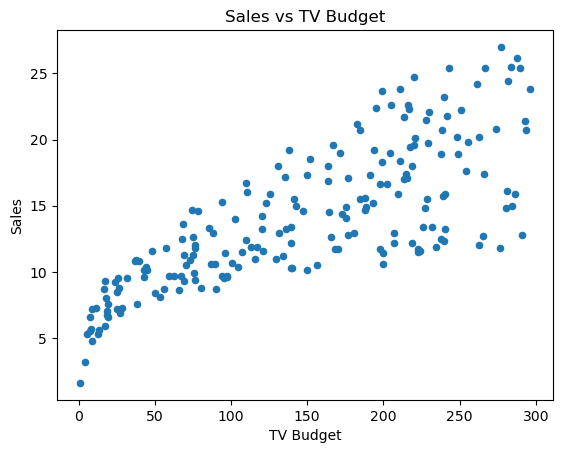

In [6]:
## Simple scatter plot of Sales vs TV Budget to check if there is relation
import matplotlib.pyplot as plt

raw_data.plot(kind='scatter', x='TV', y='Sales', title='Sales vs TV Budget')

# Add labels to the x-axis and y-axis
plt.xlabel('TV Budget')
plt.ylabel('Sales')

# Show the plot
plt.show()

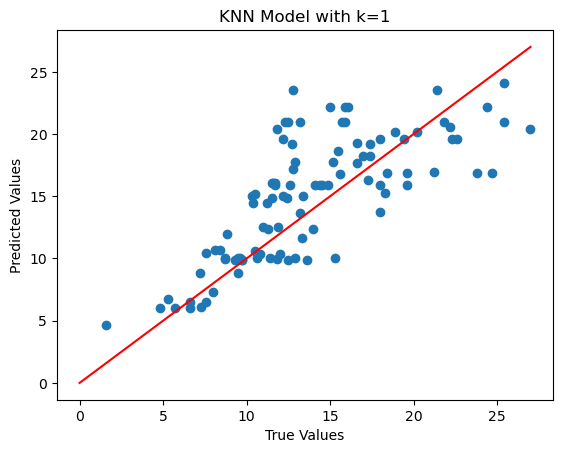

In [7]:
## K Nearest Neighbours

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Split the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(raw_data[['TV']], raw_data[['Sales']], test_size=0.5)
# Train the KNN model using the training data and specify k=3
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(train_data, train_target)

# Use the trained model to predict the target variable for the test data
predicted = knn.predict(test_data)

# Plot the scatter plot of the predicted values against the true values
plt.scatter(test_target, predicted)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("KNN Model with k=1")

# Add a line for the perfect prediction
x = np.linspace(0, max(test_target['Sales']), 100)
y = x
plt.plot(x, y, color='red')

plt.show()